# Thesis LeonW

In [1]:
import sys
print(sys.version)

3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.metrics import plot_roc_curve
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [3]:
#df5 = pd.read_csv('./documents.cvs', sep = '\t')
df5 = pd.read_csv('sample-documents.txt',sep = '\t')

In [4]:
df5.head(10)

,Unnamed: 0,Patnr,Geslacht,Geboortejaar,Datum van overlijden,Tekst_x,Tekst_y,Tekst_x.1,Tekst_y.1,Document,Arts,clean_text
0,0.0,25222576.0,1.0,1922.0,20/02/2014,NaN,Dyspnoe,Iom Dr. Schalla: ICC long voor overname.,"RR/ 156/74, Hf 82/min reg, Temp 38,0, Sat 90 %...",1.000104e+10,CAR0022286,iom icc long overnam
1,1.0,25222983.0,2.0,1963.0,NaN,NaN,dyspnoe,B/iom dr. Volders \n-d-dimeer nabepalen (hoewe...,"RR 219/98 li re 210/90 , regelmatige pols v...",1.001966e+10,CAR0021189,biom volder ddimer nabepal hoewel lag verdenk ...
2,2.0,25225233.0,1.0,1942.0,20/10/2011,NaN,NaN,Bumetanide en nitro iv. Dagelijks controle EL/NF.,"Algemeen: matig ziek, CVD: halsvenen tot mid. ...",1.000203e+10,CAR0005336,bumetanid nitro dagelijk control elnf
3,3.0,25226312.0,2.0,1949.0,NaN,NaN,pijn op de borst,#NAME?,Niet ziek\nCardiopulmonaal nu geen afwijkingen...,1.000024e+10,CAR0021189,expectatief tav pob blaauw lat gan
4,4.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,Geen tekenen van vochtretentie. Nycturie 10x m...,"gewicht: 65 kg, bloeddruk links: 143 / 76 mmHg...",1.002463e+10,CAR0000311,teken vochtretentie nycturie 10x mevr bekend k...
5,5.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,"ischemische hartziekte, LVEF hersteld, 62%. Bl...","gewicht: 62 kg, bloeddruk links: 130 / 80 mmHg...",1.003251e+10,CAR0002480,ischemisch hartziekt lvef hersteld 62 blijvend...
6,6.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,Draaiduizeligheid met evenwichtsverlies niet c...,"gewicht: 63 kg, bloeddruk links: 133 / 83 mmHg...",1.002565e+10,CAR0002480,draaiduizel evenwichtsverlies cardiaal consult...
7,7.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,"Klachten van vermoeidheid, druk op de borst en...","gewicht: 63 kg, bloeddruk links: 155 / 90 mmHg...",1.002441e+10,CAR0000311,klacht vermoeid druk borst toenem klacht pijn ...
8,8.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,"ischemisch hartfalen met herstelde LVEF, 64%.\...","gewicht: 63 kg, bloeddruk links: 141 / 91 mmHg...",1.002785e+10,CAR0002480,ischemisch hartfal hersteld lvef 64 crt dadequ...
9,9.0,25226312.0,2.0,1949.0,NaN,NaN,NaN,Klachten van pijn tussen de schouderbladen per...,"gewicht: 64 kg, bloeddruk links: 120 / 80 mmHg...",1.002495e+10,CAR0002480,klacht pijn tuss schouderblad persister cag co...


In [5]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2732 non-null   float64
 1   Patnr                 2732 non-null   float64
 2   Geslacht              2732 non-null   float64
 3   Geboortejaar          2732 non-null   float64
 4   Datum van overlijden  1320 non-null   object 
 5   Tekst_x               162 non-null    object 
 6   Tekst_y               841 non-null    object 
 7   Tekst_x.1             2491 non-null   object 
 8   Tekst_y.1             2499 non-null   object 
 9   Document              2732 non-null   float64
 10  Arts                  2727 non-null   object 
 11  clean_text            2490 non-null   object 
dtypes: float64(5), object(7)
memory usage: 2.8+ MB


In [6]:
df5.isna().sum()/len(df5)*100

Unnamed: 0              91.118047
Patnr                   91.118047
Geslacht                91.118047
Geboortejaar            91.118047
Datum van overlijden    95.708573
Tekst_x                 99.473325
Tekst_y                 97.265841
Tekst_x.1               91.901557
Tekst_y.1               91.875549
Document                91.118047
Arts                    91.134302
clean_text              91.904808
dtype: float64

# Cleaning

In [7]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers: word_tokenize('ebrahim^hazrati')'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('dutch'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers: word_tokenize('ebrahim^hazrati')'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   

##remove specific word list
def remove_special_words(text):
    '''Remove the User predefine useless words from the text. The list should be in the lowercase.'''
    special_words_list=['af', 'iv', 'ivm', 'mg', 'dd', 'vrijdag','afspraak','over','met', 'van', 'patient', 'dr', 'geyik','heyman','bekker','dries','om', 'sel', 'stipdonk', 'eurling', 'knackstedt'
                        'lencer','volder','schalla']# list : words
    querywords=text.split()
    textwords = [word for word in querywords if word.lower() not in special_words_list]
    text=' '.join(textwords)
    return text
    
#%%
# Stemming with 'Snowball Dutch stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('dutch')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)


#%% make a text c' '.join(data['le'][6])learning function specific for pitch decks so far 
def normalization_pitchdecks(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    remove_special_words,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

## Create label column

In [8]:
df5['dead'] = np.where(df5['Datum van overlijden'].isna() == True , 0, 1)
df5['dead'] = pd.Categorical(df5['dead'])

In [9]:
df5['dead'].value_counts()/len(df5)*100

0    95.708573
1     4.291427
Name: dead, dtype: float64

## Clean text and store in seperate columns in df5

In [10]:
 df5 = df5.replace(np.nan, '', regex=True)   # change NaN to empty string

In [11]:
Tekst_x = []
Tekst_x_1 = []
Tekst_y = []
Tekst_y_1 = []


for i in tqdm(df5['Tekst_x']):
    Tekst_x.append(normalization_pitchdecks(i)) 
    
for i in tqdm(df5['Tekst_x.1']):
    Tekst_x_1.append(normalization_pitchdecks(i))
    
for i in tqdm(df5['Tekst_y']):
    Tekst_y.append(normalization_pitchdecks(i))
    
for i in tqdm(df5['Tekst_y.1']):
    Tekst_y_1.append(normalization_pitchdecks(i))

100%|██████████| 30759/30759 [00:06<00:00, 4864.63it/s]


In [12]:
df5['x_clean'] = pd.Series(Tekst_x)
df5['y_clean'] = pd.Series(Tekst_y)
df5['x_1_clean'] = pd.Series(Tekst_x_1)
df5['y_1_clean'] = pd.Series(Tekst_y_1)

In [13]:
df5.head(10)

,Unnamed: 0,Patnr,Geslacht,Geboortejaar,Datum van overlijden,Tekst_x,Tekst_y,Tekst_x.1,Tekst_y.1,Document,Arts,clean_text,dead,x_clean,y_clean,x_1_clean,y_1_clean
0,0.0,25222576.0,1.0,1922.0,20/02/2014,,Dyspnoe,Iom Dr. Schalla: ICC long voor overname.,"RR/ 156/74, Hf 82/min reg, Temp 38,0, Sat 90 %...",10001036886.0,CAR0022286,iom icc long overnam,1,,dyspnoe,iom icc long overnam,rr hf min reg temp sat o hartton slecht beo...
1,1.0,25222983.0,2.0,1963.0,,,dyspnoe,B/iom dr. Volders \n-d-dimeer nabepalen (hoewe...,"RR 219/98 li re 210/90 , regelmatige pols v...",10019659290.0,CAR0021189,biom volder ddimer nabepal hoewel lag verdenk ...,0,,dyspnoe,biom volder ddimer nabepal hoewel lag verdenk ...,rr li re regelmat pol min temp sat o cor s...
2,2.0,25225233.0,1.0,1942.0,20/10/2011,,,Bumetanide en nitro iv. Dagelijks controle EL/NF.,"Algemeen: matig ziek, CVD: halsvenen tot mid. ...",10002030149.0,CAR0005336,bumetanid nitro dagelijk control elnf,1,,,bumetanid nitro dagelijk control elnf,algemen matig ziek cvd halsven mid kaakhoek so...
3,3.0,25226312.0,2.0,1949.0,,,pijn op de borst,#NAME?,Niet ziek\nCardiopulmonaal nu geen afwijkingen...,10000238023.0,CAR0021189,expectatief tav pob blaauw lat gan,0,,pijn borst,nam,ziek cardiopulmonal afwijk extremiteit oedem
4,4.0,25226312.0,2.0,1949.0,,,,Geen tekenen van vochtretentie. Nycturie 10x m...,"gewicht: 65 kg, bloeddruk links: 143 / 76 mmHg...",10024632894.0,CAR0000311,teken vochtretentie nycturie 10x mevr bekend k...,0,,,teken vochtretentie nycturie x mevr bekend kle...,gewicht kg bloeddruk link mmhg hartritm mi...
5,5.0,25226312.0,2.0,1949.0,,,,"ischemische hartziekte, LVEF hersteld, 62%. Bl...","gewicht: 62 kg, bloeddruk links: 130 / 80 mmHg...",10032512106.0,CAR0002480,ischemisch hartziekt lvef hersteld 62 blijvend...,0,,,ischemisch hartziekt lvef hersteld blijvend k...,gewicht kg bloeddruk link mmhg hartritm mi...
6,6.0,25226312.0,2.0,1949.0,,,,Draaiduizeligheid met evenwichtsverlies niet c...,"gewicht: 63 kg, bloeddruk links: 133 / 83 mmHg...",10025645008.0,CAR0002480,draaiduizel evenwichtsverlies cardiaal consult...,0,,,draaiduizel evenwichtsverlies cardiaal consult...,gewicht kg bloeddruk link mmhg hartritm mi...
7,7.0,25226312.0,2.0,1949.0,,,,"Klachten van vermoeidheid, druk op de borst en...","gewicht: 63 kg, bloeddruk links: 155 / 90 mmHg...",10024406054.0,CAR0000311,klacht vermoeid druk borst toenem klacht pijn ...,0,,,klacht vermoeid druk borst toenem klacht pijn ...,gewicht kg bloeddruk link mmhg hartritm mi...
8,8.0,25226312.0,2.0,1949.0,,,,"ischemisch hartfalen met herstelde LVEF, 64%.\...","gewicht: 63 kg, bloeddruk links: 141 / 91 mmHg...",10027846602.0,CAR0002480,ischemisch hartfal hersteld lvef 64 crt dadequ...,0,,,ischemisch hartfal hersteld lvef crt dadequat...,gewicht kg bloeddruk link mmhg hartritm mi...
9,9.0,25226312.0,2.0,1949.0,,,,Klachten van pijn tussen de schouderbladen per...,"gewicht: 64 kg, bloeddruk links: 120 / 80 mmHg...",10024949582.0,CAR0002480,klacht pijn tuss schouderblad persister cag co...,0,,,klacht pijn tuss schouderblad persister cag co...,gewicht kg bloeddruk link mmhg hartritm mi...


In [14]:
# look at a former NaN

print(df5['x_clean'][0])
print(type(df5['x_clean'][0]))


<class 'str'>


# Wordcloud

In [15]:
doc_list = df5['x_1_clean'].dropna().tolist()
doc_list[:5]

['iom icc long overnam',
 'biom volder ddimer nabepal hoewel lag verdenk le  iom volder relatief lag beschouw acut ct opnam b burinex iv uur nitro ogv bloeddruk cardial enzym vervolg incl hstnt x  uur vooralsnog acs medicatie wel indien hstnt doorstijgt pm start acebetablokker pm nader diagnostiek verminderd kamerfunctie mricagbiopt morg lab elnflfcrphbl',
 'bumetanid nitro dagelijk control elnf',
 'nam',
 'teken vochtretentie nycturie x mevr bekend klein blas tallium aanwijz ischemie lateral wand mevr doorverwez hartcatheterisatie aandacht blaascatheter dunn ch klein blas tijden interventie']

(-0.5, 1599.5, 799.5, -0.5)

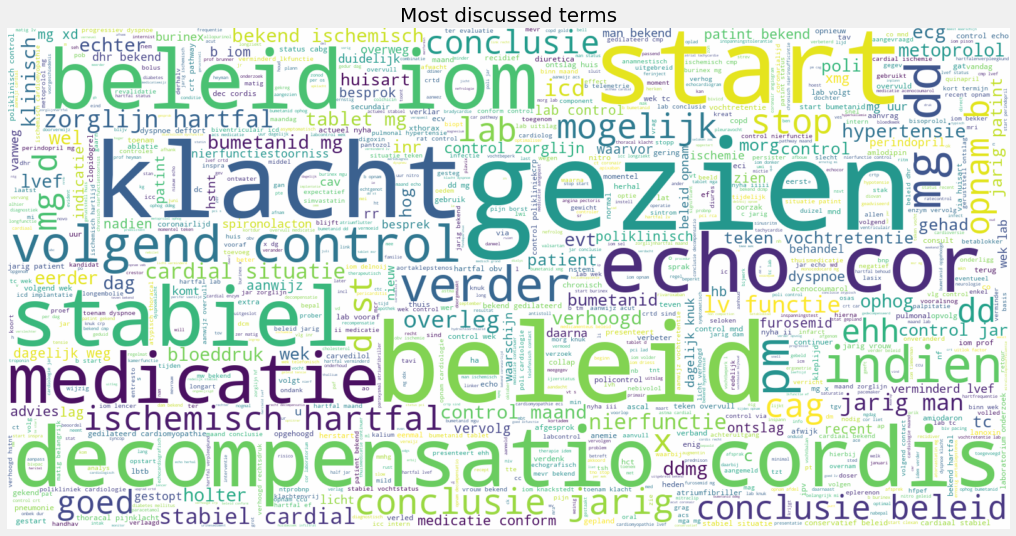

In [16]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(doc_list))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [17]:
ls= []

for i in doc_list:
    ls.append(str(i).split())

In [18]:
fdist = FreqDist()

for sentence in ls:
    for token in sentence:
        fdist[token] +=1

In [19]:
top_title = fdist.most_common(20)

In [20]:
ls = []
for i in top_title:
    ls.append({'Word': i[0], 'Num': i[1]})

df = pd.DataFrame(ls)

In [21]:
co = sns.cubehelix_palette(n_colors=20,
                           start=0,
                           rot=0.4,
                           gamma=1.0,
                           hue=0.8,
                           light=0.85,
                           dark=0.15,
                           reverse=True,
                           as_cmap=False)

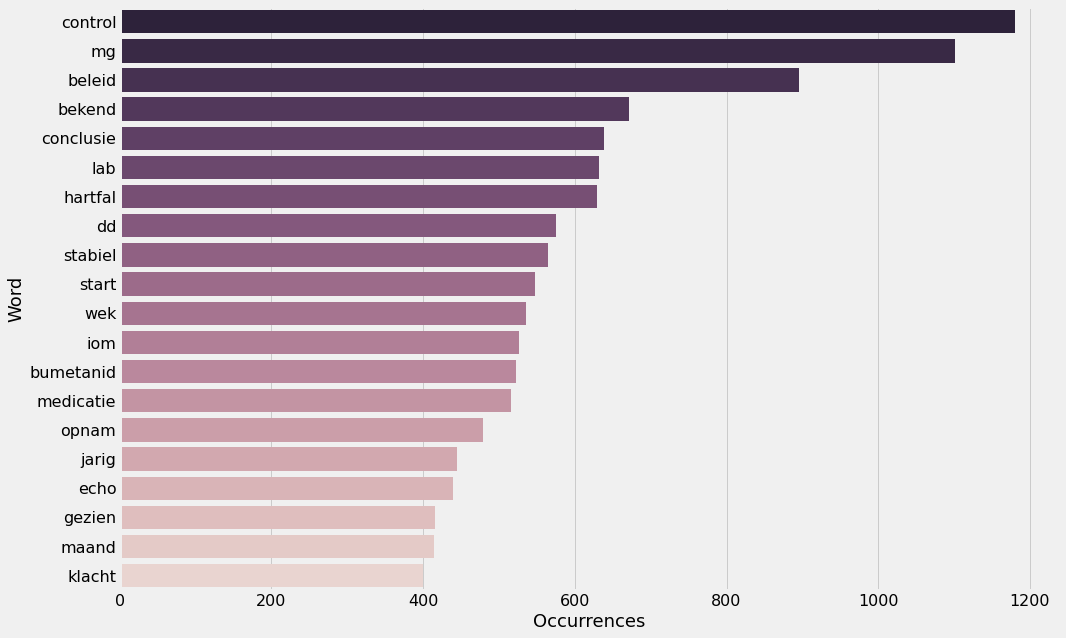

In [22]:
plt.figure(figsize=(15,10))

sns.barplot(data = df, y = 'Word', x = 'Num', palette=co)
plt.xlabel('Occurrences', fontsize=18)
plt.ylabel('Word', fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

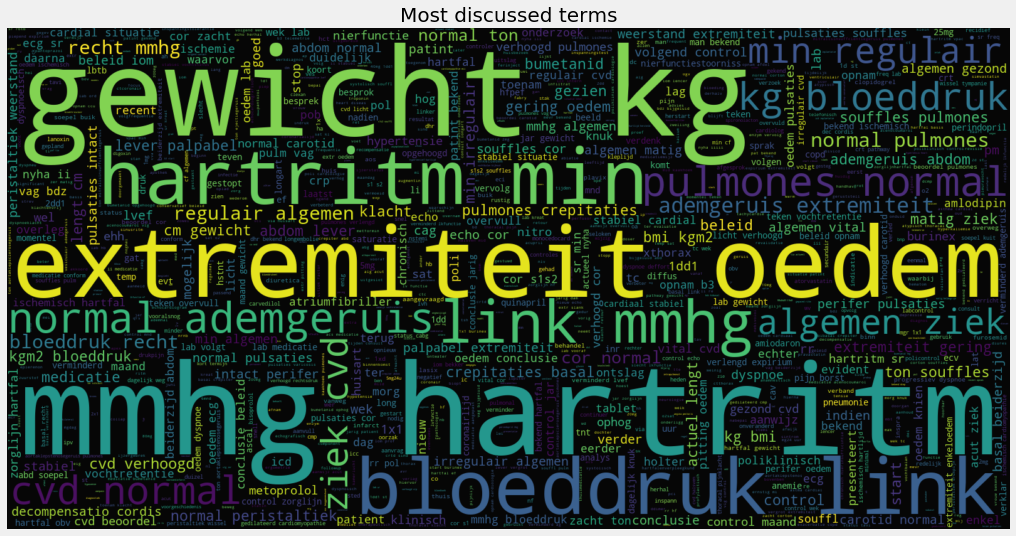

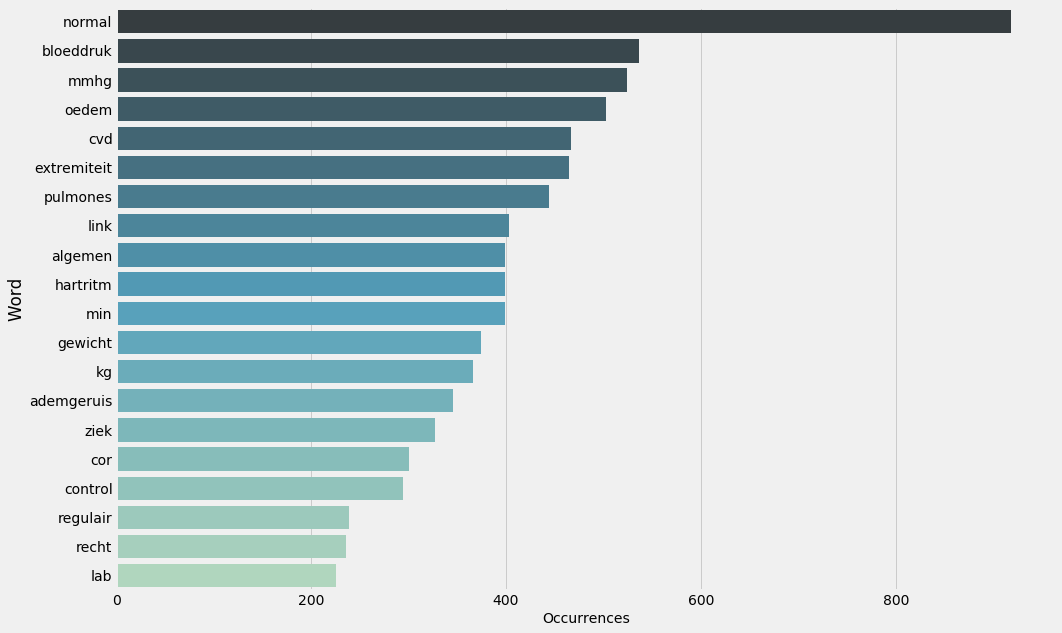

# I create a column which contains the text of all columns for each row and insert the wordcloud and word frequency of this column below

In [23]:
df5["full"] = df5["x_clean"] +" "+ df5["x_1_clean"] +" "+ df5['y_1_clean'] +" "+ df5['y_clean']
df5['full'].iloc[0]

' iom icc long overnam rr  hf min reg temp  sat  o hartton slecht beoordel ademgeruis cvd verhoogd vag bdz verlengd piepend expirium expiratoir rhonchie crepitaties oedem teken dvt ecg sr atriaal ritm min normal geleid li as path qs stt segmentafwijk onveranderd ecg lab abg o  xthorax slank cor gestuwd beeld li basal sluier sinus infiltrat sluit dyspnoe'

In [24]:
df5['Patnr'].nunique()  # 131 unqiue patients

522

### Group by 'Patientnr' and 'label', and join together the different text fields for every patient

In [25]:
combined = df5.groupby(['Patnr', 'dead'])['full'].apply(lambda x: ' '.join(x.astype(str))).reset_index()

After this command my 'combined' frame looked like this because every patient will get 1 & 0 for the dead column regardless 

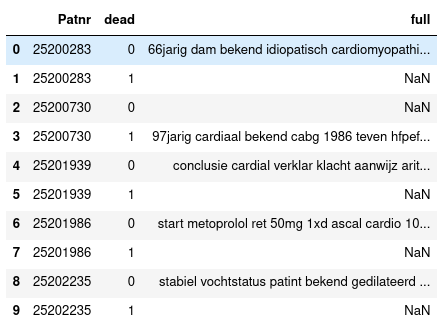

In [26]:
# replace the NaN's

combined = combined.replace(np.nan, 1, regex=True) 
combined = combined[combined['full'] != 1]

In [27]:
# make index go from 1:length(combined), otherwise the subsample for SVM doesn't work

combined.index = np.arange(0, len(combined))

In [28]:
# lets look at how the text for this patient is structured in the old dataframe:

df5[df5['Patnr'] == 25226312].head(2) # multiple rows -> multiple 'full' fields

,Unnamed: 0,Patnr,Geslacht,Geboortejaar,Datum van overlijden,Tekst_x,Tekst_y,Tekst_x.1,Tekst_y.1,Document,Arts,clean_text,dead,x_clean,y_clean,x_1_clean,y_1_clean,full
3,3.0,25226312.0,2.0,1949.0,,,pijn op de borst,#NAME?,Niet ziek\nCardiopulmonaal nu geen afwijkingen...,10000238023.0,CAR0021189,expectatief tav pob blaauw lat gan,0,,pijn borst,nam,ziek cardiopulmonal afwijk extremiteit oedem,nam ziek cardiopulmonal afwijk extremiteit oe...
4,4.0,25226312.0,2.0,1949.0,,,,Geen tekenen van vochtretentie. Nycturie 10x m...,"gewicht: 65 kg, bloeddruk links: 143 / 76 mmHg...",10024632894.0,CAR0000311,teken vochtretentie nycturie 10x mevr bekend k...,0,,,teken vochtretentie nycturie x mevr bekend kle...,gewicht kg bloeddruk link mmhg hartritm mi...,teken vochtretentie nycturie x mevr bekend kl...


In [29]:
pd.set_option('max_colwidth', 100)


combined[combined['Patnr'] == 25226312]['full'] # now all the text for this patient is joined in one text field

114     nam ziek cardiopulmonal afwijk extremiteit oedem pijn borst  teken vochtretentie nycturie x mev...
Name: full, dtype: object

In [30]:
pd.set_option('max_colwidth', 50)

combined.head(10) # now we have for each unique patient the label and all the text that belongs to him/her in one field

,Patnr,dead,full
0,25001910.0,1,conclusies decompensatio cordis recht gekend ...
1,25003868.0,0,jarig man bekend ischemisch hartfal lv funct...
2,25004155.0,1,iap drs majidi v omm overlegd vandag cag aange...
3,25005437.0,1,c progressiev dyspnoe for hoestklacht lwi com...
4,25006021.0,1,actuel lengt cm gewicht kg bmi kgm bloedd...
5,25006146.0,1,zer matig lv functie patint status cabg recen...
6,25006695.0,0,cardiologisch onderzoek stabiel cardial si...
7,25010848.0,0,patient ging ontslag poliklinisch vervolgd ma...
8,25017005.0,0,licht nfs aanwijz hartfal oral prehydratie ov...
9,25019632.0,0,vooralsnog cardiaal stabiel situatie obes pati...


In [31]:
len(combined)

522

# Keras

In [32]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Bidirectional
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Layer

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics



Using TensorFlow backend.


## Prepare input for LSTM

In [33]:
docs = combined['full'].tolist()

labels = combined['dead'].values

In [34]:
docs[1]

'  jarig man bekend ischemisch hartfal lv functie  patint vult icd gezien twijfel medicatie ne nut gemaakt hartfalenverpleegkund verder begeleid entresto mra labcontrol wek sam inr afhank waardes switch medicatie volgend control afsprek actuel lengt  cm gewicht  kg bmi  kgm bloeddruk link   mmhg hartritm sr gr av block  min regulair cvd normal pulmones crepitaties basal recht extremiteit oedem   omstand stabiel cardial situatie patint zer matig lv functie status voorwandinfarct patint vult icd gezien twijfel medicatie ne nut gemaakt hartfalenverpleegkund verder begeleid actuel lengt  cm gewicht  kg bmi  kgm bloeddruk recht   mmhg bloeddruk link   mmhg hartritm  min regulair algemen vital cor normal ton souffles pulmones normal ademgeruis recht crepitatiesextremiteit gering oedem     '

In [35]:
print(len(docs)) #check if length is the same
print('\n')
print(len(labels))

522


522


In [36]:
df5['dead'].value_counts()

0    29439
1     1320
Name: dead, dtype: int64

In [37]:
# check number of unique words to estimate a reasonable vocab size

one_str = ''.join(docs)
unique_words = Counter(one_str.split())
len(unique_words) 

8757

In [38]:
vocab_size = 46468  
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs[:2])

[[36099, 28823, 8103, 39896, 4542, 5837, 44420, 35861, 30709, 33521, 43163, 8362, 9621, 31695, 18299, 21653, 4197, 39896, 28823, 8103, 22871, 34377, 27767, 11742, 35198, 10731, 22702, 33500, 33873, 38686, 44109, 28193, 33317, 3910, 45356, 30429, 1868, 32999, 40799, 5843, 5231, 19057, 27601, 7469, 40246, 31492, 19032, 33527, 43837, 28509, 6035, 17972, 18857, 18849, 7960, 25012, 31492, 2005, 3938, 14560, 11563, 11411, 38956, 14747, 2753, 16116, 1853, 25050, 39896, 37734, 13762, 32788, 21923, 22601, 20222, 8408, 39451, 38053, 19491, 14550, 9106, 31994, 46341, 35358, 10058, 1870, 16235, 28402, 41232, 26117, 2855, 3225, 41146, 4936, 30899, 35861, 16933, 9404, 35825, 28860, 43991, 3681, 28823, 8103, 14293, 38579, 17610, 17260, 30990, 19847, 37798, 16807, 26364, 17610, 25050, 19459, 37734, 13762, 32788, 21923, 22601, 8408, 35336, 14550, 11703, 717, 39896, 19491, 14550, 9106, 8257, 46341, 14550, 18742, 1870, 28402, 14794, 25050, 19459, 37734, 13762, 32788, 39451, 14550, 19491, 14550, 9106, 219

In [39]:
x = []

for i in encoded_docs:
    x.append(len(i))
    
print("In my sample the largest document has", max(x), "words.")

In my sample the largest document has 1679 words.


In [40]:
len(x)

522

In [41]:
# now every document will be represented by a vector of the same length: 200 values 

max_length = 1500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[36099 28823  8103 ...     0     0     0]
 [41700 33106 29825 ...     0     0     0]
 [40645 26916 39639 ...     0     0     0]
 ...
 [21012  1326 18048 ...     0     0     0]
 [26339 41700 33769 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [42]:
X = padded_docs
y = labels

df5.dtypes

Unnamed: 0                object
Patnr                     object
Geslacht                  object
Geboortejaar              object
Datum van overlijden      object
Tekst_x                   object
Tekst_y                   object
Tekst_x.1                 object
Tekst_y.1                 object
Document                  object
Arts                      object
clean_text                object
dead                    category
x_clean                   object
y_clean                   object
x_1_clean                 object
y_1_clean                 object
full                      object
dtype: object

In [43]:
labels = np.array(labels)

print(type(padded_docs))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
len(X)

522

In [46]:
len(y)

522

In [47]:
#len(df5.Patnr.unique())
#print(len(df5))
#
#df5.groupby('Patnr').dead.sum()
#
#len(df5[df5.Patnr==5021462])

# Increase vocab size by 20%

In [48]:
print(vocab_size)
vocab_size = round(vocab_size*1.2)
print(vocab_size)

46468
55762


## LSTM with Early Stopping

In [49]:
from keras.callbacks import ModelCheckpoint

In [50]:
max_length = 1500

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 32, input_length = max_length))
model.add(Bidirectional(LSTM(64, activation='linear')))
model.add(Dense(32, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#early stopping when validation loss is at minimum & save best model measured by validation accuracy
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 32)          1784384   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,838,209
Trainable params: 1,838,209
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# fit model
history = model.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=1, callbacks=[es, mc])

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 333 samples, validate on 84 samples
Epoch 1/1
333/333 [==============================] - 57s 171ms/step - loss: 0.6907 - accuracy: 0.5435 - val_loss: 0.6970 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69699, saving model to best_model
105/105 [==============================] - 5s 49ms/step
Accuracy: 44.761905


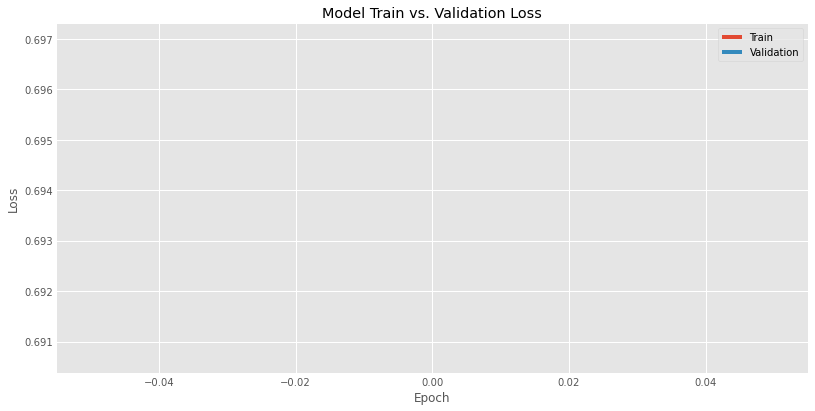

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [53]:
# for me to run the model with the categorical loss function i need to adjust the labels to categorical:

#from keras.utils import to_categorical
#labels = to_categorical(labels)
#y_test = to_categorical(y_test)

# units of the last dense layer to 2 

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 32)          1784384   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,838,209
Trainable params: 1,838,209
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
model.save_weights('hf_model2.weights')

In [55]:
from keras.utils import to_categorical
X_bi_test = to_categorical(y_test)
y_bi_test = to_categorical(X_test)

In [56]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

InvalidArgumentError:  Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1
	 [[node loss_1/dense_2_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_keras_scratch_graph_3475]

Function call stack:
keras_scratch_graph


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

prediction_proba =model.predict(X_test)

In [ ]:
np.mean(prediction_proba)

In [ ]:
vecint = np.vectorize(int)

prediction=vecint((prediction_proba>0.519))

print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,prediction_proba)


In [ ]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
plot_roc(prediction_proba,y_test)

## K-Fold CV with ROC

In [ ]:
plt.rcParams["figure.figsize"] = (13,13)
# define folds
kf = StratifiedKFold(5, shuffle=True, random_state=42) 
i=0
fold = 0
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
# apply the LSTM to the different folds by looping 
for (train, test), color in zip(kf.split(X, combined['dead']), colors):  
    fold += 1
    print(f"Fold #{fold}")
    
    # define model
    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim = 32, input_length = max_length))
    model.add(Bidirectional(LSTM(64, activation='linear')))
    model.add(Dense(32, activation='linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    
    # compile the model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    
    #early stopping when validation loss is at minimum & save best model measured by validation accuracy
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    mc = ModelCheckpoint('best_model', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    
    # fit model
    model.fit(X_train,
                        y_train,
                        validation_split=0.2,
                        verbose=1,
                        epochs=100,
                        callbacks=[es, mc])
    # results
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print('Accuracy: %f' % (accuracy*100))
    print('\n')
    
    probas_ = model.predict(X_test)
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    
    lw = 2

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 0])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Random')

mean_tpr /= kf.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()
    

# Baseline models
Using same word embeddings as for the neural net


In [ ]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = padded_docs
y = combined['dead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [ ]:
#fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
predictions_NB_proba = Naive.predict_proba(X_test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
print(confusion_matrix(predictions_NB,y_test))
print(classification_report(predictions_NB,y_test))

roc_auc_score(y_test,predictions_NB_proba[:,1])#not working really

## SVM

In [ ]:
def balanced_subsample(y, size=None):
    
    '''Sample from data and keep the classes balanced'''

    subsample = []

    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size / len(y.value_counts().index))

    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()

    return subsample

### Repeat the steps to create the input for LSTM (fed into SVM now)

In [ ]:
# apply the function | here you can just play around with the size: maybe 1600, 1800, 2000, 2200 etc.
svm_sample = balanced_subsample(combined['dead'], round(len(combined)*0.3)) 

# extract the indices picked by the function to create subsample
svm_sample = combined.iloc[svm_sample, :]  
svm_sample = svm_sample.replace(np.nan, 1, regex=True) 
svm_sample = svm_sample[svm_sample['full'] != 1]

svm_text = svm_sample['full'].tolist()

svm_labels = svm_sample['dead'].tolist()

vocab_size = 5000
svm_encoded_docs = [one_hot(d, vocab_size) for d in svm_text]

max_length = 1500
svm_padded_docs = pad_sequences(svm_encoded_docs, maxlen=max_length, padding='post')

svm_X = svm_padded_docs
svm_y = svm_labels

svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X, svm_y, test_size=0.6, random_state=42)

In [ ]:
import numpy as np
print(np.shape(svm_X_train))
print(len(svm_y_train))
print(len(svm_y_test))
print(len(svm_sample))

In [ ]:
svm_sample.head(10)

In [ ]:
svm_sample['dead'].value_counts()

### Taking a percentage of all data for SVM

In [ ]:
np.shape(svm_X_train)

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

for i in tqdm(range(1)):
    SVM.fit(svm_X_train, svm_y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(svm_X_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, svm_y_test)*100)
#print(confusion_matrix(predictions_SVM, svm_y_test))
print(classification_report(predictions_SVM, svm_y_test))

## Logistic Regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions_LR = logmodel.predict(X_test)

print("LR Accuracy -> ",accuracy_score(predictions_LR, y_test)*100)
print(classification_report(predictions_LR,y_test))

# Using TF-IDF represenation as input

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
processed_text = combined['full']

In [ ]:
processed_text

In [ ]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit(processed_text)
tfidf = vectorizer.transform(processed_text)

print(tfidf.shape)
print('\n')
#print(vectorizer.get_feature_names())

In [ ]:
tfidf_words = vectorizer.get_feature_names()
tfidf_words

In [ ]:
y = labels

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf, y, test_size=0.2, random_state=42)

## Naive Bayes

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train_tf,y_train_tf)
# predict the labels on validation dataset
predictions_NB_tf = Naive.predict(X_test_tf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy -> ",accuracy_score(predictions_NB_tf, y_test_tf)*100)
print(classification_report(predictions_NB_tf,y_test_tf))

## SVM

In [ ]:
# apply the function | here you can just play around with the size: maybe 1600, 1800, 2000, 2200 etc.
#svm_sample = balanced_subsample(combined['dead'], len(combined)*0.9) 

# extract the indices picked by the function to create subsample
#svm_sample = combined.iloc[svm_sample, :] 

In [ ]:
#vectorizer = TfidfVectorizer()
#tfidf_svm = vectorizer.fit_transform(svm_sample['full'])
#print(tfidf_svm.shape)
#print('\n')
#print(vectorizer.get_feature_names())

In [ ]:
#y = svm_sample['dead']

#X_train_tf_svm, X_test_tf_svm, y_train_tf_svm, y_test_tf_svm = train_test_split(tfidf_svm, y, test_size=0.2, random_state=42)

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tf,y_train_tf)
# predict the labels on validation dataset
predictions_SVM_tf = SVM.predict(X_test_tf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy -> ",accuracy_score(predictions_SVM_tf, y_test_tf)*100)
print(classification_report(predictions_SVM_tf,y_test_tf))

## Logistic Regression

In [ ]:
np.shape(X_train_tf)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train_tf, y_train_tf)

predictions_LR_tf = logmodel.predict(X_test_tf)

print("LR Accuracy -> ",accuracy_score(predictions_LR_tf, y_test_tf)*100)
print(classification_report(predictions_LR_tf,y_test_tf))

In [ ]:
importance = logmodel.coef_[0]

In [ ]:
importance_score = list()

for i in importance:
    importance_score.append(i)

In [ ]:
print(len(importance_score))
print(len(tfidf_words))

In [ ]:
imp = pd.Series(importance_score)
words = pd.Series(tfidf_words)

In [ ]:
df = pd.DataFrame(columns = ['Word', 'Importance'])

In [ ]:
df['Importance'] = imp
df['Word'] = words

In [ ]:
df = df.sort_values('Importance')

In [ ]:
df.head(20)

In [ ]:
plt.figure(figsize=(12,11))


sns.barplot(data = df.head(40), y = 'Word', x = 'Importance')
plt.title('Most important words to predict a low risk adverse event')

plt.savefig('Predictors_low_risk_event.png')

In [ ]:
plt.figure(figsize=(12,11))


sns.barplot(data = df.tail(40), y = 'Word', x = 'Importance')
plt.title('Most important words to predict a high risk adverse event')

plt.savefig('Predictors_high_risk_event.png')

# Simulation 

In [ ]:
test_pat = df5[df5['Patnr'] == 25258134]['full']
test_pat

## Keep adding one document 

In [ ]:
one = test_pat.iloc[0]
two = test_pat.iloc[0] + ' ' + test_pat.iloc[1]
three = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] 
four = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3]
five = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4]
six = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5]
seven = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6]
eight = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] 
nine = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8]
ten = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] 
eleven = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10]
twelve = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11]
thir = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12]
fourt = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13]
fivt = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14]
sixt = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14] + ' ' + test_pat.iloc[15]
sev = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14] + ' ' + test_pat.iloc[15] + ' ' + test_pat.iloc[16]
eighti = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14] + ' ' + test_pat.iloc[15] + ' ' + test_pat.iloc[16] + ' ' + test_pat.iloc[17]
ninet = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14] + ' ' + test_pat.iloc[15] + ' ' + test_pat.iloc[16] + ' ' + test_pat.iloc[17] + ' ' + test_pat.iloc[18]
twent = test_pat.iloc[0] + ' ' + test_pat.iloc[1] + ' ' + test_pat.iloc[2] + ' ' + test_pat.iloc[3] + ' ' + test_pat.iloc[4] + ' ' + test_pat.iloc[5] + ' ' + test_pat.iloc[6] + ' ' + test_pat.iloc[7] + ' ' + test_pat.iloc[8] + ' ' + test_pat.iloc[9] + ' ' + test_pat.iloc[10] + ' ' + test_pat.iloc[11] + ' ' + test_pat.iloc[12] + ' ' + test_pat.iloc[13] + ' ' + test_pat.iloc[14] + ' ' + test_pat.iloc[15] + ' ' + test_pat.iloc[16] + ' ' + test_pat.iloc[17] + ' ' + test_pat.iloc[18] + ' ' + test_pat.iloc[19]


In [ ]:
docs = [one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thir, fourt, fivt, sixt, sev, eighti, ninet, twent]

In [ ]:
results = list()

for i in docs:
    tf = vectorizer.transform(pd.Categorical(i))
    results.append(logmodel.predict(tf))

In [ ]:
results

In [ ]:
test_pat.iloc[18]

# ROC comparison for Baseline TF/IDF Models

Since those models receive a different input than our LSTM, does it make sense to add the LSTM performance in this graph as well? 

Or should we put the LSTM together with the baseline models which receive the LSTM input as well?

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
lw = 2
plt.figure(0).clf()
plt.title('Receiver Operating Curve Baseline TF/IDF')


fpr, tpr, thresh = metrics.roc_curve(y_test_tf, predictions_NB_tf)
auc = round(metrics.roc_auc_score(y_test_tf, predictions_NB_tf), 3)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test_tf, predictions_LR_tf)
auc = round(metrics.roc_auc_score(y_test_tf, predictions_LR_tf), 3)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test_tf, predictions_SVM_tf)
auc = round(metrics.roc_auc_score(y_test_tf, predictions_SVM_tf), 3)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Random')

plt.legend(loc=0)
plt.xlabel('FP-rate')
plt.ylabel('TP-rate')

# Attention Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output


In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, emded_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=emded_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=emded_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [ ]:
max_length = 1500
vocab_size = 46468  
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

att_model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
# the labels were encoded as pandas array before, 
# it threw an error for the model below so I transformed it into numpy array
labels = np.array(labels)


In [ ]:
from keras import optimizers
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
type(y_train)

In [ ]:
# compile the model
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
att_model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

#early stopping when validation loss is at minimum 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# fit model
att_model.fit(padded_docs,
          labels,
          validation_split=0.2,
          verbose=1,
          epochs=100,
          callbacks=[es])
# results
loss, accuracy = att_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))